In [76]:
import torch
# %pip install torchvision

import torchvision
from torchvision.datasets import MNIST
# %pip install numpy==1.25
import numpy as np
# %pip uninstall pillow -y
# %pip install pillow
from PIL import Image


In [77]:
dataset = MNIST(root="data/", 
                # download=True
               )

In [78]:
len(dataset)

60000

In [79]:
test_dataset = MNIST(root="root/", train=False, 
                     # download=True
                    )
len(test_dataset)

10000

In [80]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

In [81]:
# %pip install numpy==1.23
# %pip install matplotlib
# %pip install pillow  # this is the right way to download the python packages

In [82]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: 5


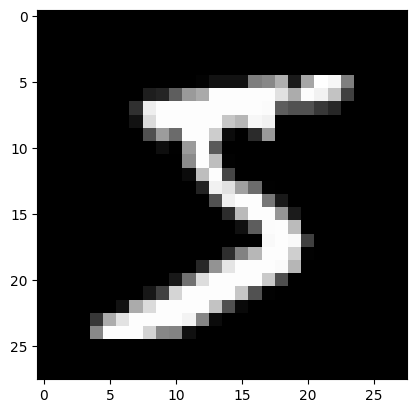

In [83]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print("Label:", label)

In [84]:
# %pip install --upgrade matplotlib

Label: 3


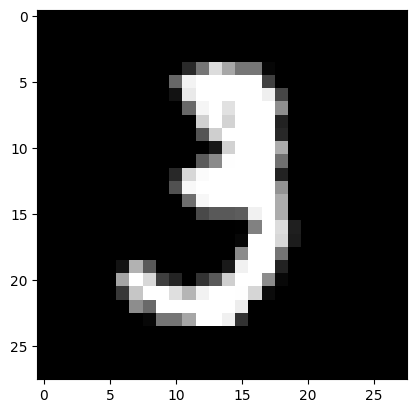

In [85]:
image, label = dataset[10]
plt.imshow(image, cmap='gray')
print("Label:", label)

In [86]:
import torchvision.transforms as transforms
# torchvision.transforms module contains many such predefined functions.

In [87]:
dataset = MNIST(root="data/", train=True,
                transform=transforms.ToTensor()
               )

In [88]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)


torch.Size([1, 28, 28]) 5


In [89]:
print(img_tensor[0, 10:15, 10:15])
print(torch.max(img_tensor), torch.min(img_tensor))
# with 0 representing black, 1 white, and the values in between different shades of grey.

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])
tensor(1.) tensor(0.)


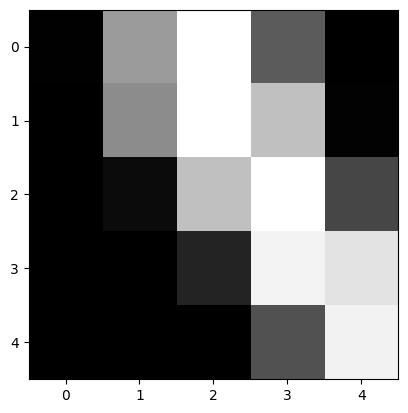

In [90]:
plt.imshow(img_tensor[0, 10:15, 10:15], cmap='gray')

In [91]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [92]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [93]:
import torch.nn as nn

input_size = 28 * 28
num_classes = 10

model = nn.Linear(input_size, num_classes)  # input size, output size

In [94]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[-0.0007, -0.0152,  0.0156,  ..., -0.0177, -0.0150,  0.0125],
        [-0.0245, -0.0139,  0.0248,  ...,  0.0214,  0.0011,  0.0237],
        [ 0.0282, -0.0194, -0.0356,  ..., -0.0033,  0.0206, -0.0020],
        ...,
        [ 0.0316, -0.0297,  0.0101,  ..., -0.0199, -0.0127, -0.0062],
        [ 0.0152, -0.0055,  0.0339,  ...,  0.0313, -0.0208,  0.0293],
        [ 0.0097,  0.0118, -0.0114,  ...,  0.0323,  0.0123,  0.0279]],
       requires_grad=True)

In [95]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([ 0.0180, -0.0198,  0.0347,  0.0313,  0.0090,  0.0231,  0.0323, -0.0104,
         0.0145, -0.0272], requires_grad=True)

In [96]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images)
    print(outputs)
    break

tensor([7, 3, 7, 5, 3, 8, 1, 5, 0, 6, 9, 0, 1, 8, 6, 3, 9, 0, 8, 1, 2, 1, 8, 2,
        3, 9, 2, 0, 1, 2, 4, 1, 1, 4, 5, 3, 8, 4, 4, 5, 8, 8, 8, 1, 8, 3, 4, 5,
        0, 3, 7, 3, 5, 0, 1, 9, 4, 3, 1, 0, 0, 8, 6, 1, 6, 7, 1, 8, 4, 2, 6, 2,
        3, 4, 1, 0, 7, 3, 0, 7, 1, 6, 5, 7, 7, 3, 0, 4, 3, 6, 2, 0, 2, 4, 2, 3,
        3, 3, 3, 4, 2, 5, 2, 2, 6, 2, 0, 6, 4, 3, 2, 8, 2, 2, 4, 3, 1, 7, 1, 3,
        5, 1, 6, 1, 8, 8, 9, 1])
torch.Size([128, 1, 28, 28])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (3584x28 and 784x10)

In [97]:
images.shape  # the tensor has the attribute `shape`

torch.Size([128, 1, 28, 28])

In [98]:
images.reshape(128, 784).shape

torch.Size([128, 784])

In [99]:
print(type(images))

<class 'torch.Tensor'>


In [100]:
class Person:
    def __init__(self, name, age):
        self.name = name
        self.age = age

    def say_hello(self):
        print("Hello my name is " + self.name + "!")

In [101]:
bob = Person("Bob", 32)

In [102]:
bob.say_hello()

Hello my name is Bob!


In [103]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out

model = MnistModel()

In [104]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [105]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 0.0211,  0.0302,  0.0057,  ...,  0.0022,  0.0066,  0.0011],
         [ 0.0173,  0.0327, -0.0127,  ...,  0.0025, -0.0320,  0.0348],
         [-0.0090, -0.0227, -0.0245,  ...,  0.0212,  0.0207,  0.0143],
         ...,
         [-0.0206, -0.0262, -0.0192,  ..., -0.0287,  0.0338,  0.0270],
         [-0.0145, -0.0312, -0.0271,  ...,  0.0252, -0.0011, -0.0217],
         [-0.0320,  0.0122, -0.0338,  ..., -0.0102,  0.0247,  0.0304]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0195,  0.0226, -0.0147, -0.0260,  0.0098,  0.0033, -0.0017,  0.0028,
          0.0074, -0.0331], requires_grad=True)]

In [106]:
for images, labels in train_loader:
    print(images.shape)
    outputs = model(images)
    break

print("outputs.shape: ", outputs.shape)
print("Sample outputs: ", outputs[:2].data)

torch.Size([128, 1, 28, 28])
outputs.shape:  torch.Size([128, 10])
Sample outputs:  tensor([[-1.6712e-01,  2.4132e-02,  7.1035e-02,  2.7540e-01,  2.2309e-03,
          1.7427e-01,  4.7878e-02,  6.9738e-02, -5.1939e-01,  3.2343e-01],
        [-3.3392e-01, -4.0015e-04,  3.8512e-01,  2.0323e-01, -4.8633e-02,
          1.0951e-01,  4.1562e-01,  2.2574e-01, -4.0366e-01, -1.9434e-01]])


In [107]:
import torch.nn.functional as F

In [108]:
outputs[:2]

tensor([[-1.6712e-01,  2.4132e-02,  7.1035e-02,  2.7540e-01,  2.2309e-03,
          1.7427e-01,  4.7878e-02,  6.9738e-02, -5.1939e-01,  3.2343e-01],
        [-3.3392e-01, -4.0015e-04,  3.8512e-01,  2.0323e-01, -4.8633e-02,
          1.0951e-01,  4.1562e-01,  2.2574e-01, -4.0366e-01, -1.9434e-01]],
       grad_fn=<SliceBackward0>)

In [109]:
probs = F.softmax(outputs, dim=1)
print("Sample probabilities:\n", probs[:2].data)
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.0802, 0.0971, 0.1017, 0.1248, 0.0950, 0.1128, 0.0994, 0.1016, 0.0564,
         0.1310],
        [0.0667, 0.0931, 0.1369, 0.1141, 0.0887, 0.1039, 0.1411, 0.1167, 0.0622,
         0.0767]])
Sum:  0.9999999403953552


In [110]:
max_probs, preds = torch.max(probs, dim=1)  # preds are the predictions of every image
print(preds)
print(max_probs)

tensor([9, 6, 3, 6, 1, 3, 1, 5, 7, 9, 3, 0, 9, 1, 1, 7, 2, 6, 7, 6, 2, 1, 6, 6,
        7, 9, 6, 6, 3, 6, 1, 2, 1, 1, 6, 1, 5, 3, 4, 2, 9, 6, 1, 6, 6, 7, 1, 6,
        1, 3, 9, 3, 6, 6, 9, 7, 9, 1, 6, 2, 9, 9, 6, 7, 6, 1, 2, 3, 7, 1, 6, 1,
        2, 3, 5, 7, 6, 7, 1, 5, 3, 6, 6, 6, 1, 1, 3, 9, 1, 3, 2, 2, 6, 2, 1, 3,
        1, 1, 6, 6, 7, 1, 2, 9, 3, 0, 7, 2, 9, 9, 1, 6, 6, 6, 1, 1, 3, 6, 9, 3,
        1, 2, 6, 0, 2, 7, 2, 7])
tensor([0.1310, 0.1411, 0.1210, 0.1321, 0.1216, 0.1175, 0.1207, 0.1236, 0.1253,
        0.1330, 0.1165, 0.1268, 0.1289, 0.1299, 0.1252, 0.1288, 0.1314, 0.1310,
        0.1256, 0.1213, 0.1234, 0.1193, 0.1282, 0.1339, 0.1315, 0.1174, 0.1247,
        0.1190, 0.1309, 0.1259, 0.1190, 0.1498, 0.1313, 0.1491, 0.1233, 0.1221,
        0.1268, 0.1197, 0.1280, 0.1204, 0.1387, 0.1200, 0.1284, 0.1383, 0.1132,
        0.1566, 0.1249, 0.1230, 0.1247, 0.1382, 0.1377, 0.1292, 0.1362, 0.1314,
        0.1160, 0.1143, 0.1223, 0.1445, 0.1230, 0.1236, 0.1205, 0.1343, 0.1120,
       

In [111]:
labels

tensor([7, 2, 8, 3, 8, 7, 4, 6, 3, 5, 3, 5, 8, 6, 7, 4, 2, 2, 9, 1, 2, 6, 9, 3,
        2, 3, 1, 7, 6, 9, 4, 2, 4, 4, 9, 4, 6, 6, 7, 2, 7, 8, 2, 4, 8, 4, 2, 5,
        7, 8, 8, 5, 1, 4, 4, 0, 4, 8, 7, 0, 9, 3, 3, 9, 1, 7, 7, 5, 9, 1, 9, 9,
        0, 3, 9, 8, 1, 0, 6, 1, 3, 4, 1, 1, 6, 2, 7, 8, 0, 3, 3, 4, 5, 2, 3, 9,
        4, 8, 1, 8, 4, 9, 0, 7, 9, 1, 8, 0, 5, 9, 5, 3, 1, 3, 6, 6, 3, 1, 5, 3,
        2, 8, 7, 8, 3, 3, 0, 3])

In [112]:
outputs[:2]

tensor([[-1.6712e-01,  2.4132e-02,  7.1035e-02,  2.7540e-01,  2.2309e-03,
          1.7427e-01,  4.7878e-02,  6.9738e-02, -5.1939e-01,  3.2343e-01],
        [-3.3392e-01, -4.0015e-04,  3.8512e-01,  2.0323e-01, -4.8633e-02,
          1.0951e-01,  4.1562e-01,  2.2574e-01, -4.0366e-01, -1.9434e-01]],
       grad_fn=<SliceBackward0>)

In [113]:
torch.sum(preds == labels)

tensor(14)

In [114]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [115]:
accuracy(outputs, labels)

tensor(0.1094)

In [116]:
probs

tensor([[0.0802, 0.0971, 0.1017,  ..., 0.1016, 0.0564, 0.1310],
        [0.0667, 0.0931, 0.1369,  ..., 0.1167, 0.0622, 0.0767],
        [0.0790, 0.1019, 0.1106,  ..., 0.0935, 0.0944, 0.1087],
        ...,
        [0.0962, 0.0841, 0.1121,  ..., 0.1328, 0.1050, 0.0805],
        [0.0803, 0.1126, 0.1290,  ..., 0.0792, 0.0778, 0.1092],
        [0.0941, 0.0840, 0.1156,  ..., 0.1278, 0.0909, 0.1133]],
       grad_fn=<SoftmaxBackward0>)

In [117]:
outputs

tensor([[-1.6712e-01,  2.4132e-02,  7.1035e-02,  ...,  6.9738e-02,
         -5.1939e-01,  3.2343e-01],
        [-3.3392e-01, -4.0015e-04,  3.8512e-01,  ...,  2.2574e-01,
         -4.0366e-01, -1.9434e-01],
        [-2.9145e-02,  2.2624e-01,  3.0738e-01,  ...,  1.3931e-01,
          1.4969e-01,  2.9056e-01],
        ...,
        [-5.2211e-02, -1.8632e-01,  1.0119e-01,  ...,  2.7087e-01,
          3.5905e-02, -2.2953e-01],
        [-1.0089e-01,  2.3697e-01,  3.7351e-01,  ..., -1.1412e-01,
         -1.3255e-01,  2.0643e-01],
        [-8.7035e-02, -2.0009e-01,  1.1949e-01,  ...,  2.1950e-01,
         -1.2164e-01,  9.8799e-02]], grad_fn=<AddmmBackward0>)

In [118]:
loss_fn = F.cross_entropy

In [119]:
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.2893, grad_fn=<NllLossBackward0>)


In [120]:
# evalutaion: find a numerical expression or equivalent for (an equation, formula, or function).

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = []  # used to store the result of evaluation in each epoch

    for epoch in range(epochs):
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [121]:
l1 = [1, 2, 3, 4, 5]

In [122]:
l2 = [x * 2 for x in l1]
l2

[2, 4, 6, 8, 10]

In [123]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [124]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out

    def training_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        return loss

    def validation_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        acc = accuracy(out, labels)
        return {"val_loss": loss, "val_acc": acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

model = MnistModel()

In [125]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.3123531341552734, 'val_acc': 0.0823773741722107}

In [126]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9475, val_acc: 0.6128
Epoch [1], val_loss: 1.6801, val_acc: 0.7199
Epoch [2], val_loss: 1.4803, val_acc: 0.7590
Epoch [3], val_loss: 1.3292, val_acc: 0.7821
Epoch [4], val_loss: 1.2128, val_acc: 0.8002


In [127]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.1212, val_acc: 0.8091
Epoch [1], val_loss: 1.0476, val_acc: 0.8161
Epoch [2], val_loss: 0.9873, val_acc: 0.8219
Epoch [3], val_loss: 0.9370, val_acc: 0.8283
Epoch [4], val_loss: 0.8945, val_acc: 0.8318


In [128]:
history3 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.8580, val_acc: 0.8350
Epoch [1], val_loss: 0.8263, val_acc: 0.8384
Epoch [2], val_loss: 0.7986, val_acc: 0.8419
Epoch [3], val_loss: 0.7741, val_acc: 0.8440
Epoch [4], val_loss: 0.7523, val_acc: 0.8463


In [129]:
history4 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.7327, val_acc: 0.8493
Epoch [1], val_loss: 0.7150, val_acc: 0.8513
Epoch [2], val_loss: 0.6990, val_acc: 0.8534
Epoch [3], val_loss: 0.6843, val_acc: 0.8546
Epoch [4], val_loss: 0.6709, val_acc: 0.8558


In [130]:
history5 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.6585, val_acc: 0.8573
Epoch [1], val_loss: 0.6471, val_acc: 0.8593
Epoch [2], val_loss: 0.6365, val_acc: 0.8601
Epoch [3], val_loss: 0.6266, val_acc: 0.8610
Epoch [4], val_loss: 0.6174, val_acc: 0.8618


In [131]:
history6 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.6088, val_acc: 0.8627
Epoch [1], val_loss: 0.6007, val_acc: 0.8636
Epoch [2], val_loss: 0.5931, val_acc: 0.8651
Epoch [3], val_loss: 0.5860, val_acc: 0.8660
Epoch [4], val_loss: 0.5792, val_acc: 0.8670


In [132]:
history = [result0] + history1 + history2 + history3 + history4

Text(0.5, 1.0, 'Accuracy vs. No. of epochs')

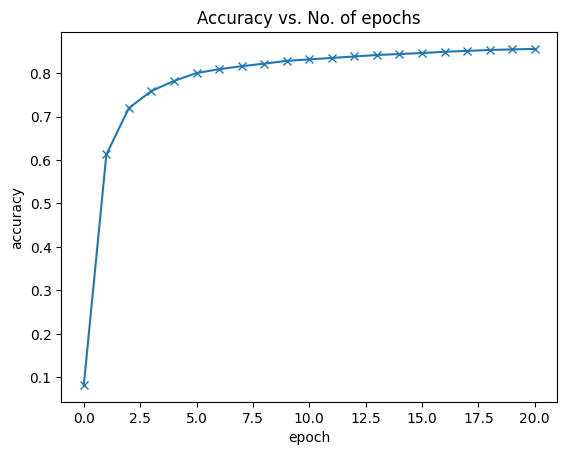

In [134]:
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs')

In [135]:
test_dataset = MNIST(root="data/",
                     train=False,
                     transform=transforms.ToTensor())

shape: torch.Size([1, 28, 28])
label: 7


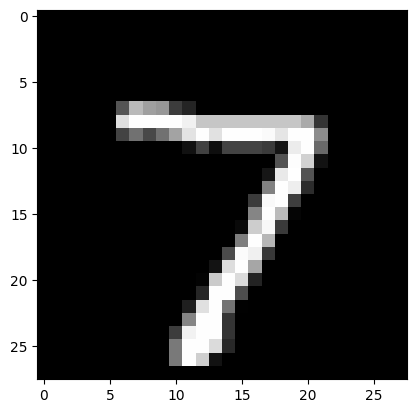

In [136]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print("shape:", img.shape)
print("label:", label)

In [137]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

label: 7 , predicted: 7


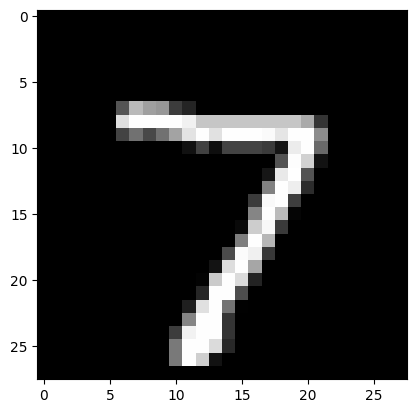

In [140]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print("label:", label, ", predicted:", predict_image(img, model))

label: 0 , predicted: 0


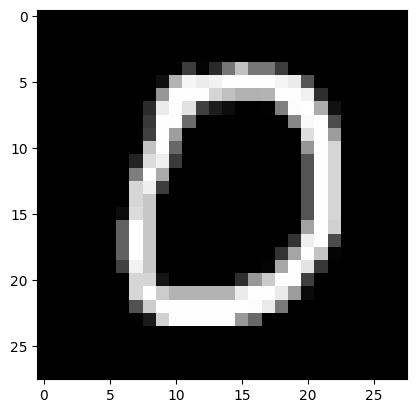

In [141]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap='gray')
print("label:", label, ", predicted:", predict_image(img, model))

label: 2 , predicted: 8


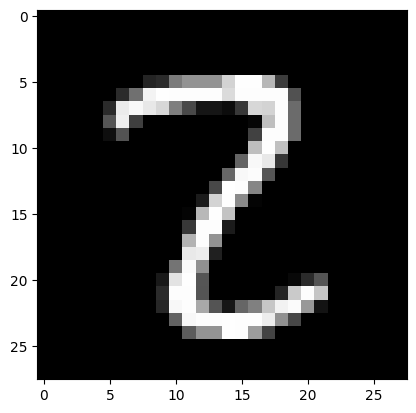

In [142]:
img, label = test_dataset[1839]
plt.imshow(img[0], cmap='gray')
print("label:", label, ", predicted:", predict_image(img, model))

In [143]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_loss': 0.553479015827179, 'val_acc': 0.869921863079071}

In [150]:
torch.save(model.state_dict(), "mnist-logistric.pth")

In [151]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0273, -0.0139,  0.0197,  ...,  0.0168,  0.0217, -0.0086],
                      [-0.0231,  0.0154,  0.0080,  ..., -0.0187, -0.0168,  0.0357],
                      [-0.0222, -0.0068, -0.0183,  ...,  0.0262,  0.0151, -0.0218],
                      ...,
                      [-0.0206, -0.0005,  0.0334,  ..., -0.0144, -0.0219, -0.0327],
                      [-0.0343,  0.0258, -0.0060,  ..., -0.0094, -0.0273, -0.0076],
                      [-0.0037, -0.0348, -0.0082,  ...,  0.0274, -0.0126,  0.0327]])),
             ('linear.bias',
              tensor([-0.0259,  0.0924, -0.0339, -0.0706,  0.0181,  0.0909, -0.0248,  0.0670,
                      -0.1509, -0.0385]))])

In [152]:
model2 = MnistModel()

In [153]:
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[-1.8231e-02,  3.2895e-02,  3.0647e-02,  ...,  3.4422e-02,
                        2.4162e-02,  2.0688e-02],
                      [ 2.9305e-02, -5.7697e-05, -1.4199e-02,  ...,  3.4074e-02,
                       -7.3502e-03, -3.1393e-02],
                      [ 9.2940e-03,  6.1949e-03, -7.8956e-03,  ...,  8.2574e-03,
                       -1.0385e-02, -2.1523e-02],
                      ...,
                      [ 1.2497e-02, -3.3686e-02,  1.6982e-02,  ..., -3.0428e-02,
                       -1.0187e-02, -2.3193e-02],
                      [ 1.4643e-03, -2.2408e-02,  9.2643e-03,  ..., -2.6435e-02,
                       -7.2240e-03, -1.0130e-02],
                      [-9.2531e-03, -1.7669e-04, -3.4618e-02,  ..., -1.9500e-02,
                        3.6561e-03,  3.4904e-02]])),
             ('linear.bias',
              tensor([ 0.0040,  0.0297, -0.0334,  0.0166,  0.0273,  0.0245,  0.0252,  0.0154,
                      -0.0304,

In [154]:
evaluate(model2, test_loader)

{'val_loss': 2.343391180038452, 'val_acc': 0.06279297173023224}

In [156]:
model2.load_state_dict(torch.load('mnist-logistric.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0273, -0.0139,  0.0197,  ...,  0.0168,  0.0217, -0.0086],
                      [-0.0231,  0.0154,  0.0080,  ..., -0.0187, -0.0168,  0.0357],
                      [-0.0222, -0.0068, -0.0183,  ...,  0.0262,  0.0151, -0.0218],
                      ...,
                      [-0.0206, -0.0005,  0.0334,  ..., -0.0144, -0.0219, -0.0327],
                      [-0.0343,  0.0258, -0.0060,  ..., -0.0094, -0.0273, -0.0076],
                      [-0.0037, -0.0348, -0.0082,  ...,  0.0274, -0.0126,  0.0327]])),
             ('linear.bias',
              tensor([-0.0259,  0.0924, -0.0339, -0.0706,  0.0181,  0.0909, -0.0248,  0.0670,
                      -0.1509, -0.0385]))])

In [157]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model2, test_loader)

In [158]:
result

{'val_loss': 0.553479015827179, 'val_acc': 0.869921863079071}